
**Decision Tree Classifier : ID3**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
# load the iris datasets
iris = datasets.load_iris()
#df = pd.DataFrame(data.data, columns=data.feature_names)
#df.head()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
df["target"].value_counts()


target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

**Check the missing values**

In [10]:
df.apply(lambda x:sum(x.isnull()))

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

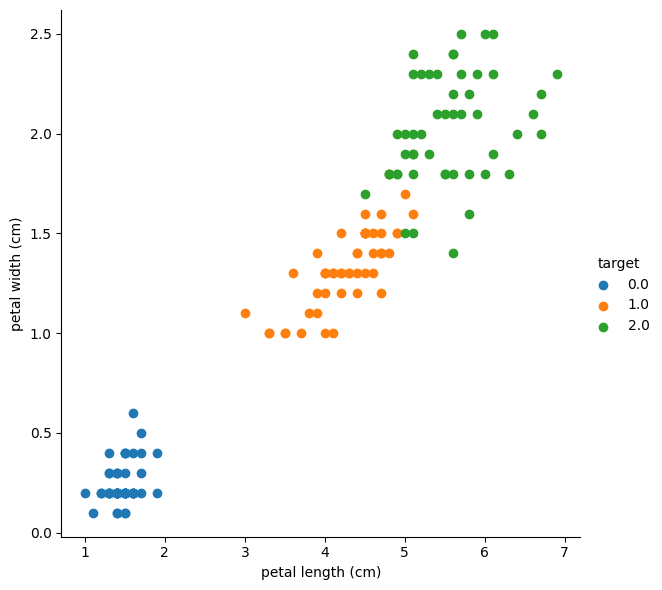

In [11]:
sns.FacetGrid(df, hue="target",height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()


**Splitting the data and Defining Decision Tree Algorithm**

In [12]:
from sklearn.model_selection import train_test_split
#Splitting the data into training and testing sets
X=df.drop('target',axis=1)
Y=df['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

#defining(training) the decision tree
model = DecisionTreeClassifier(criterion="entropy",max_depth=5)  # for ID3
#model=DecisionTreeClassifier()  // for CART
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [13]:
model.score(iris.data, iris.target)

0.98

**Make predictions**

In [14]:
expected = iris.target
predicted = model.predict(iris.data)
print(predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


**Summarize the fit of the model**

In [15]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.98      0.97        50
           2       0.98      0.96      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

[[50  0  0]
 [ 0 49  1]
 [ 0  2 48]]


**Visualizing the Decision Tree**

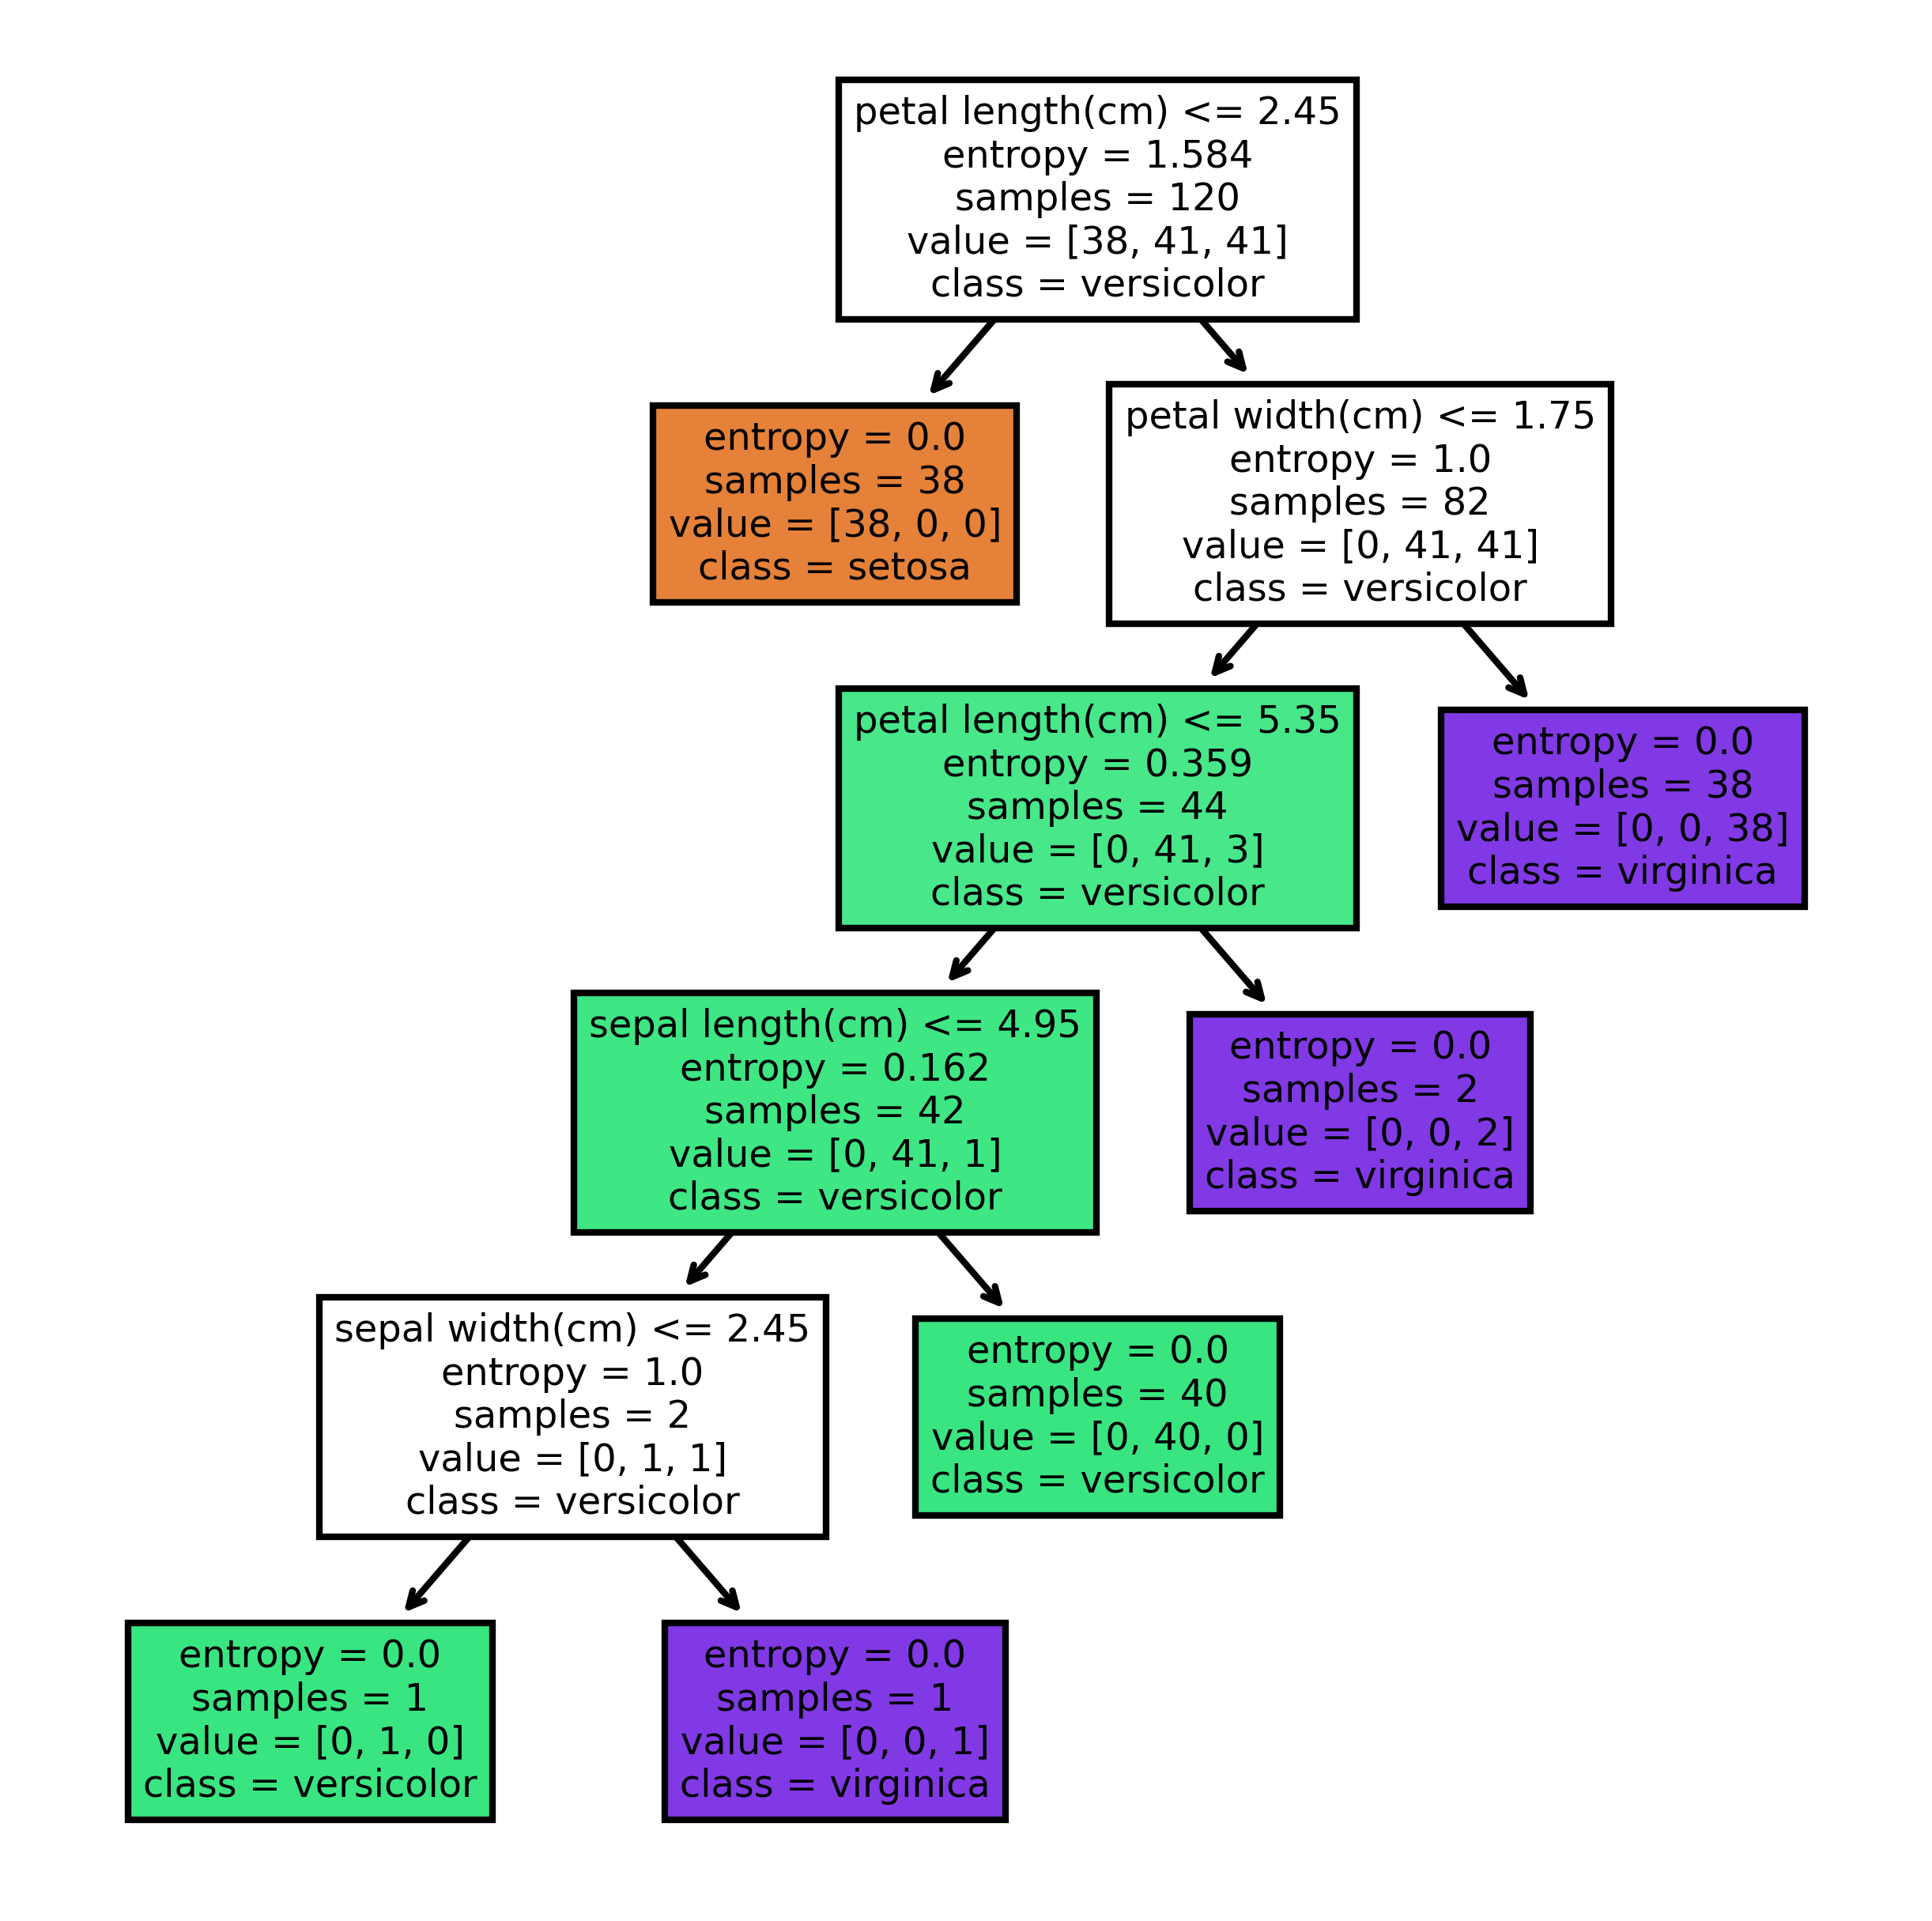

In [17]:
from sklearn import tree
names=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
classes=['setosa','versicolor','virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=600)
tree.plot_tree(model,feature_names=names,class_names=classes,filled=True);

**Predicting Species for a set of values**

In [18]:
X_new = [[0.3,3.7,3.3,1.2]]
# change the values and check the species

In [19]:
species = model.predict(X_new)
# "setosa": 0, "versicolor": 1, "virginica": 2
if species==0:
    print ("setosa")
elif species==1:
    print("versicolor")  
else:
    print("virginica")      

virginica


**Tunning parameters**

In [20]:
def Decision_Tree(Type,Depth):
        # import some data to play with
        iris = datasets.load_iris()
        X = iris.data[:, :2]  # we only take the first two features.
        Y = iris.target
        h = .02  # step size in the mesh
        # we create an instance of Neighbours Classifier and fit the data.
        model =DecisionTreeClassifier(criterion=Type,max_depth=Depth)  
                
        model.fit(X, Y)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.show()
        
        model.fit(iris.data, iris.target)
        expected = iris.target
        predicted = model.predict(iris.data)
        print(metrics.classification_report(expected, predicted))
        print(metrics.confusion_matrix(expected, predicted))

In [21]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

In [22]:
i = interact(Decision_Tree, Type=['gini','entropy'],Depth=(1,10),continuous_update=False)

interactive(children=(Dropdown(description='Type', options=('gini', 'entropy'), value='gini'), IntSlider(value…